10000 10000
Input dataset; [[  1 100]
 [  1  99]
 [  1  98]
 ...
 [100   3]
 [100   2]
 [100   1]]
Outputs;  [100  99  98 ... 300 200 100]
Epoch 1/50
106/106 [==============================] - 1s 5ms/step - loss: 77.4262 - val_loss: 72.5465
Epoch 2/50
106/106 [==============================] - 0s 4ms/step - loss: 36.7338 - val_loss: 34.7354
Epoch 3/50
106/106 [==============================] - 0s 4ms/step - loss: 24.7559 - val_loss: 28.0303
Epoch 4/50
106/106 [==============================] - 0s 4ms/step - loss: 17.9766 - val_loss: 19.6820
Epoch 5/50
106/106 [==============================] - 0s 4ms/step - loss: 13.2957 - val_loss: 18.5240
Epoch 6/50
106/106 [==============================] - 0s 3ms/step - loss: 8.8682 - val_loss: 9.3952
Epoch 7/50
106/106 [==============================] - 0s 4ms/step - loss: 6.6565 - val_loss: 10.4552
Epoch 8/50
106/106 [==============================] - 0s 3ms/step - loss: 5.2073 - val_loss: 8.4121
Epoch 9/50
106/106 [==============================

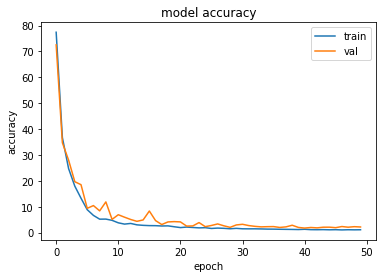

In [11]:
# https://authors.library.caltech.edu/29665/1/SIUieeetit93.pdf

# z = x * y
# z = x^2 - y^2

import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from keras import Input, Model
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt

X = list(range(1,101, 1))
Y = list(range(100,0,-1))


# X = list(range(1,101, 2))
# Y = list(range(100,0,-2))


trainingInput = np.array([ [x,y] for x in X for y in Y])
trainingOutput = np.array([ (x*y) for x in X for y in Y])

print(len(trainingInput),len(trainingOutput))

print("Input dataset;", trainingInput)
print("Outputs; ", trainingOutput)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1)
])


lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=5e-3,
    decay_steps=106,
    decay_rate=0.95)

opt = keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=opt, loss="mape")

history = model.fit(trainingInput, trainingOutput, batch_size=90, validation_split=0.05, epochs=50, verbose=1, shuffle=True)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [13]:
a = np.array([[10, 2], [3.5,4], [0.5, 21], [48.6, 1.5], [25, 25], [-10, 10], [-5, 5], [-5,-5]])
np.set_printoptions(formatter={"float_kind": lambda x: "%g" % x})
print(model.predict(a))


[[20.5307]
 [14.8399]
 [12.7581]
 [69.7171]
 [620.868]
 [-60.1225]
 [-34.806]
 [0.174232]]


[[0 4.60517]
 [0 4.59512]
 [0 4.58497]
 ...
 [4.60517 1.09861]
 [4.60517 0.693147]
 [4.60517 0]]
[4.60517 4.59512 4.58497 ... 5.70378 5.29832 4.60517]
Epoch 1/10
180/180 [==============================] - 1s 3ms/step - loss: 1.6882 - val_loss: 0.0335
Epoch 2/10
180/180 [==============================] - 0s 2ms/step - loss: 0.0162 - val_loss: 0.0032
Epoch 3/10
180/180 [==============================] - 0s 2ms/step - loss: 6.9678e-04 - val_loss: 3.3089e-05
Epoch 4/10
180/180 [==============================] - 0s 2ms/step - loss: 2.3569e-05 - val_loss: 1.3160e-08
Epoch 5/10
180/180 [==============================] - 0s 2ms/step - loss: 1.6932e-05 - val_loss: 5.5030e-10
Epoch 6/10
180/180 [==============================] - 0s 2ms/step - loss: 1.6843e-05 - val_loss: 4.8148e-08
Epoch 7/10
180/180 [==============================] - 0s 2ms/step - loss: 1.6744e-05 - val_loss: 7.8800e-08
Epoch 8/10
180/180 [==============================] - 0s 2ms/step - loss: 1.6631e-05 - val_loss: 1.2771e-08
E

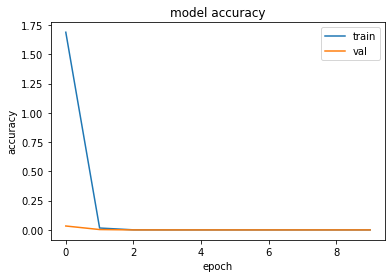

In [18]:
# Log version

import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from keras import Input, Model
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
import math

X = list(range(1,101,1))
Y = list(range(100,0,-1))
trainingInput = np.array([ [math.log(x),math.log(y)] for x in X for y in Y])
trainingOutput = np.array([ math.log(x) + math.log(y)  for x in X for y in Y])

print(trainingInput)
print(trainingOutput)

log_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    keras.layers.Dense(1, "relu"),
    keras.layers.Dense(1)
])

opt = keras.optimizers.Adam(learning_rate=0.1)
log_model.compile(optimizer=opt, loss="mse")

history = log_model.fit(trainingInput, trainingOutput, batch_size=50, validation_split=0.1, epochs=10, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [19]:
a = np.array([[math.log(50), math.log(0.5)]])
np.set_printoptions(formatter={"float_kind": lambda x: "%g" % x})
print(math.exp(log_model.predict(a)))

24.992343479371083
